# Phase 1: Exploratory Data Analysis (EDA)
## Torob Product Retrieval RAG System

**Objective**: Understand the dataset structure, identify data quality issues, and gain insights for preprocessing.

**Dataset**: Torob E-commerce Platform
- 9 relational tables
- ~1M product records
- User interaction logs (searches, views, clicks)

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import json

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.2.6


In [6]:
# Try to import Persian text reshaping libraries
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    PERSIAN_SUPPORT = True
    print("✅ Persian text reshaping libraries available")
except ImportError:
    PERSIAN_SUPPORT = False
    print("⚠️  arabic-reshaper and python-bidi not installed")
    print("   Install with: pip install arabic-reshaper python-bidi")
    print("   Persian text will be displayed without proper reshaping")

def fix_persian_text(text):
    """
    Fix Persian/Arabic text for proper display in matplotlib.
    Handles right-to-left text and character reshaping.
    """
    if not isinstance(text, str):
        return str(text)
    
    if PERSIAN_SUPPORT:
        # Reshape the text and apply bidi algorithm
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    else:
        # Return as-is if libraries not available
        return text

print("✅ Helper function defined: fix_persian_text()")
print("   Use this function to wrap Persian text before plotting")

✅ Persian text reshaping libraries available
✅ Helper function defined: fix_persian_text()
   Use this function to wrap Persian text before plotting


## 2. Load All Datasets

Loading the 9 Torob dataset tables from parquet files.

In [2]:
# Define data path
DATA_PATH = Path('../Data/')

# Load all tables
print("Loading datasets...")
print("-" * 60)

# Core product tables
base_products = pd.read_parquet(DATA_PATH / 'base_products.parquet')
members = pd.read_parquet(DATA_PATH / 'members.parquet')

# User interaction tables
searches = pd.read_parquet(DATA_PATH / 'searches.parquet')
base_views = pd.read_parquet(DATA_PATH / 'base_views.parquet')
final_clicks = pd.read_parquet(DATA_PATH / 'final_clicks.parquet')

# Reference tables
shops = pd.read_parquet(DATA_PATH / 'shops.parquet')
categories = pd.read_parquet(DATA_PATH / 'categories.parquet')
brands = pd.read_parquet(DATA_PATH / 'brands.parquet')
cities = pd.read_parquet(DATA_PATH / 'cities.parquet')

print("✅ All datasets loaded successfully!")
print("-" * 60)

# Summary of loaded datasets
datasets = {
    'base_products': base_products,
    'members': members,
    'searches': searches,
    'base_views': base_views,
    'final_clicks': final_clicks,
    'shops': shops,
    'categories': categories,
    'brands': brands,
    'cities': cities
}

for name, df in datasets.items():
    print(f"{name:20s}: {df.shape[0]:>10,} rows × {df.shape[1]:>3} columns")

Loading datasets...
------------------------------------------------------------
✅ All datasets loaded successfully!
------------------------------------------------------------
base_products       :  1,022,298 rows ×   8 columns
members             :  1,948,665 rows ×   4 columns
searches            :    588,347 rows ×   9 columns
base_views          :    199,916 rows ×   4 columns
final_clicks        :     17,371 rows ×   4 columns
shops               :     23,342 rows ×   4 columns
categories          :        746 rows ×   3 columns
brands              :      2,025 rows ×   2 columns
cities              :        651 rows ×   2 columns


## 3. Initial Data Inspection

### 3.1 Base Products - Core Product Information

### 3.2 Missing Values Analysis

### 3.3 Statistical Summary

## 4. Distinct Values Analysis - Key Columns

Checking uniqueness and cardinality of important columns.

### 4.1 Product Identity Columns

In [ ]:
print("=" * 80)
print("UNIQUENESS CHECK")
print("=" * 80)

# Base Products
print(f"\n BASE PRODUCTS:")
print(f"   Total rows: {len(base_products):,}")
print(f"   Unique random_keys: {base_products['random_key'].nunique():,}")
print(f"   Unique persian_name: {base_products['persian_name'].nunique():,}")
print(f"   Unique english_name: {base_products['english_name'].nunique():,}")


# Members (Shop Products)
print(f"\n MEMBERS")
print(f"   Total rows: {len(members):,}")
print(f"   Unique random_keys: {members['random_key'].nunique():,}")
print(f"   Unique base_random_keys: {members['base_random_key'].nunique():,}")
print(f"   Unique shop_id: {members['shop_id'].nunique():,}")

# Check relationship integrity
print(f"\n RELATIONSHIP CHECK:")
base_keys = set(base_products['random_key'])
member_base_keys = set(members['base_random_key'])
print(f"   Members pointing to non-existent base products: {len(member_base_keys - base_keys):,}")
print(f"   Base products with no members: {len(base_keys - member_base_keys):,}")
print(f"\n")
print("=" * 80)
print("SOME INFORMATION ABOUT OTHER TABLES")
print("=" * 80)

# Categories
print(f"\n CATEGORIES:")
print(f"   Total categories defined: {len(categories):,}")
print(f"   Categories used in base_products: {base_products['category_id'].nunique():,}")
print(f"   Categories used in searches: {searches['category_id'].nunique():,}")
print(f"   Products without category : {(base_products['category_id'].isnull() | (base_products['category_id'] == 0)).sum():,}")

# Brands
print(f"\n  BRANDS:")
print(f"   Total brands defined: {len(brands):,}")
print(f"   Brands used in base_products: {base_products['brand_id'].nunique():,}")
print(f"   Products without brand : {(base_products['brand_id'].isnull() | (base_products['brand_id'] == 0)).sum():,}")

# Shops
print(f"\n SHOPS:")
print(f"   Total shops defined: {len(shops):,}")
print(f"   Shops used in members: {members['shop_id'].nunique():,}")
print(f"   Shops used in final_clicks: {final_clicks['shop_id'].nunique():,}")

# Cities
print(f"\n CITIES:")
print(f"   Total cities defined: {len(cities):,}")
print(f"   Cities used in shops: {shops['city_id'].nunique():,}")

# ID Uniqueness Check for all tables
print(f"\n")
print("=" * 80)
print("ID UNIQUENESS CHECK FOR ALL TABLES")
print("=" * 80)

print(f"\n📋 SEARCHES:")
print(f"   Total rows: {len(searches):,}")
print(f"   Unique ids: {searches['id'].nunique():,}")
print(f"   Is unique? {searches['id'].is_unique}")

print(f"\n📋 BASE_VIEWS:")
print(f"   Total rows: {len(base_views):,}")
print(f"   Unique ids: {base_views['id'].nunique():,}")
print(f"   Is unique? {base_views['id'].is_unique}")

print(f"\n📋 FINAL_CLICKS:")
print(f"   Total rows: {len(final_clicks):,}")
print(f"   Unique ids: {final_clicks['id'].nunique():,}")
print(f"   Is unique? {final_clicks['id'].is_unique}")

print(f"\n📋 SHOPS:")
print(f"   Total rows: {len(shops):,}")
print(f"   Unique ids: {shops['id'].nunique():,}")
print(f"   Is unique? {shops['id'].is_unique}")

print(f"\n📋 CATEGORIES:")
print(f"   Total rows: {len(categories):,}")
print(f"   Unique ids: {categories['id'].nunique():,}")
print(f"   Is unique? {categories['id'].is_unique}")

print(f"\n📋 BRANDS:")
print(f"   Total rows: {len(brands):,}")
print(f"   Unique ids: {brands['id'].nunique():,}")
print(f"   Is unique? {brands['id'].is_unique}")

print(f"\n📋 CITIES:")
print(f"   Total rows: {len(cities):,}")
print(f"   Unique ids: {cities['id'].nunique():,}")
print(f"   Is unique? {cities['id'].is_unique}")

UNIQUENESS CHECK

 BASE PRODUCTS:
   Total rows: 1,022,298
   Unique random_keys: 1,022,298
   Unique persian_name: 953,449
   Unique english_name: 53,122

 MEMBERS
   Total rows: 1,948,665
   Unique random_keys: 1,948,665
   Unique base_random_keys: 1,022,294
   Unique base_random_keys: 23,342

 RELATIONSHIP CHECK:
   Members pointing to non-existent base products: 0
   Base products with no members: 4


SOME INFORMATION ABOUT OTHER TABLES

 CATEGORIES:
   Total categories defined: 746
   Categories used in base_products: 687
   Categories used in searches: 658
   Products without category : 0

  BRANDS:
   Total brands defined: 2,025
   Brands used in base_products: 1,908
   Products without brand : 0

 SHOPS:
   Total shops defined: 23,342
   Shops used in members: 23,342
   Shops used in final_clicks: 5,542

 CITIES:
   Total cities defined: 651
   Cities used in shops: 651


ID UNIQUENESS CHECK FOR ALL TABLES

📋 SEARCHES:
   Total rows: 588,347
   Unique ids: 588,347
   Is unique?

### 4.2 Classification Columns (Categories, Brands, Shops)

### 4.3 Text & Image Data Availability

PRICE ANALYSIS - MEMBERS TABLE

📊 PRICE STATISTICS:
   Total products: 1,948,665
   Mean price: 154,368,055,208 Toman
   Median price: 1,700,000 Toman
   Std deviation: 143,375,517,022,351 Toman
   Min price: 0 Toman
   Max price: 199,000,000,199,000,000 Toman

📈 QUARTILES:
   25th percentile: 367,500 Toman
   50th percentile: 1,700,000 Toman
   75th percentile: 6,500,000 Toman
   95th percentile: 32,000,000 Toman
   99th percentile: 95,000,000 Toman

⚠️  DATA QUALITY ISSUES:
   Zero prices: 2 (0.00%)
   Negative prices: 0 (0.00%)
   Very high prices (>100B): 57 (0.00%)


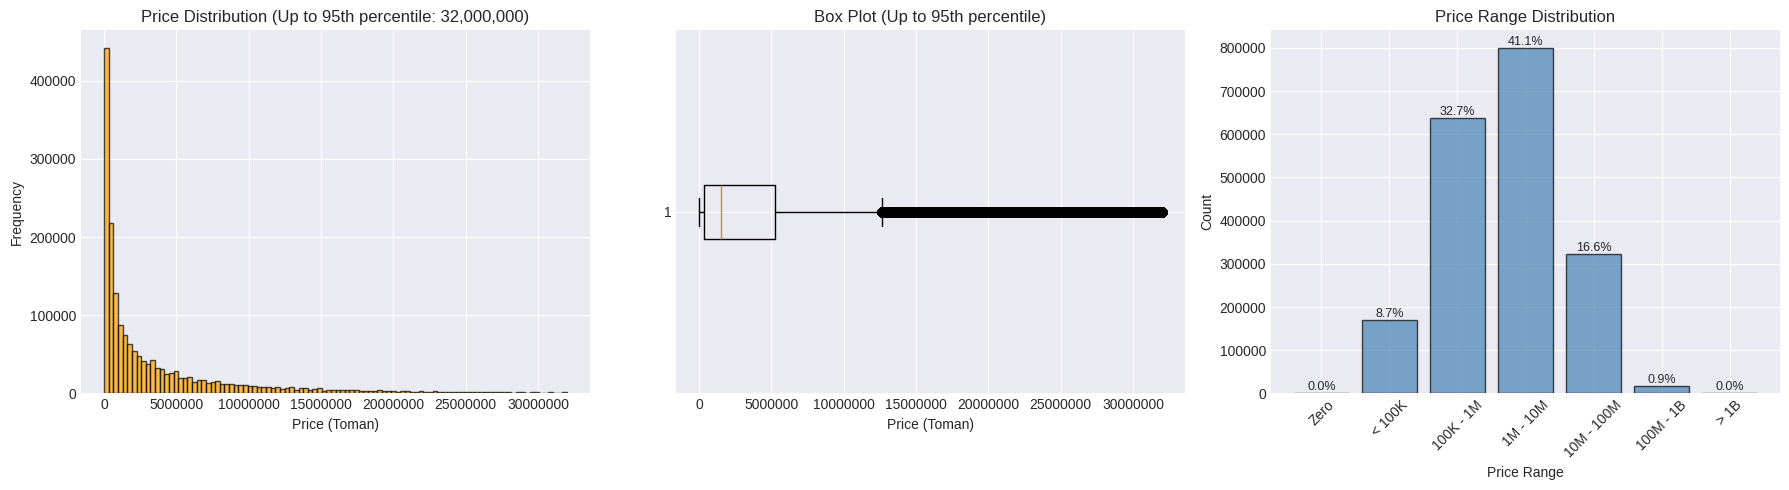


📊 PRICE RANGE DISTRIBUTION:
   Zero                :          2 ( 0.00%)
   < 100K              :    169,350 ( 8.69%)
   100K - 1M           :    637,636 (32.72%)
   1M - 10M            :    800,615 (41.09%)
   10M - 100M          :    323,518 (16.60%)
   100M - 1B           :     17,100 ( 0.88%)
   > 1B                :        444 ( 0.02%)


In [4]:
print("=" * 80)
print("PRICE ANALYSIS - MEMBERS TABLE")
print("=" * 80)

# Basic statistics
print(f"\n📊 PRICE STATISTICS:")
print(f"   Total products: {len(members):,}")
print(f"   Mean price: {members['price'].mean():,.0f} Toman")
print(f"   Median price: {members['price'].median():,.0f} Toman")
print(f"   Std deviation: {members['price'].std():,.0f} Toman")
print(f"   Min price: {members['price'].min():,.0f} Toman")
print(f"   Max price: {members['price'].max():,.0f} Toman")

# Quartiles
print(f"\n📈 QUARTILES:")
print(f"   25th percentile: {members['price'].quantile(0.25):,.0f} Toman")
print(f"   50th percentile: {members['price'].quantile(0.50):,.0f} Toman")
print(f"   75th percentile: {members['price'].quantile(0.75):,.0f} Toman")
print(f"   95th percentile: {members['price'].quantile(0.95):,.0f} Toman")
print(f"   99th percentile: {members['price'].quantile(0.99):,.0f} Toman")

# Zero and outlier analysis
zero_prices = (members['price'] == 0).sum()
negative_prices = (members['price'] < 0).sum()
very_high_prices = (members['price'] > 100_000_000_000).sum()  # > 100 billion

print(f"\n⚠️  DATA QUALITY ISSUES:")
print(f"   Zero prices: {zero_prices:,} ({zero_prices/len(members)*100:.2f}%)")
print(f"   Negative prices: {negative_prices:,} ({negative_prices/len(members)*100:.2f}%)")
print(f"   Very high prices (>100B): {very_high_prices:,} ({very_high_prices/len(members)*100:.2f}%)")

# Price ranges for distribution
ranges = [
    ("zero", 0, 0, "Zero"),
    ("range", 1, 100_000, "< 100K"),
    ("range", 100_000, 1_000_000, "100K - 1M"),
    ("range", 1_000_000, 10_000_000, "1M - 10M"),
    ("range", 10_000_000, 100_000_000, "10M - 100M"),
    ("range", 100_000_000, 1_000_000_000, "100M - 1B"),
    ("range", 1_000_000_000, float('inf'), "> 1B")
]

# Calculate counts and percentages
range_labels = []
range_counts = []
range_pcts = []

for range_type, low, high, label in ranges:
    if range_type == "zero":
        count = (members['price'] == 0).sum()
    elif high == float('inf'):
        count = (members['price'] >= low).sum()
    else:
        count = ((members['price'] >= low) & (members['price'] < high)).sum()
    pct = count / len(members) * 100
    range_labels.append(label)
    range_counts.append(count)
    range_pcts.append(pct)

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Price Distribution (without outliers - 95th percentile)
price_95 = members['price'].quantile(0.95)
axes[0].hist(members[members['price'] <= price_95]['price'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0].set_xlabel('Price (Toman)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Price Distribution (Up to 95th percentile: {price_95:,.0f})')
axes[0].ticklabel_format(style='plain', axis='x')

# 2. Box plot
axes[1].boxplot(members[members['price'] <= price_95]['price'], vert=False)
axes[1].set_xlabel('Price (Toman)')
axes[1].set_title(f'Box Plot (Up to 95th percentile)')
axes[1].ticklabel_format(style='plain', axis='x')

# 3. Price Range Distribution Bar Chart
axes[2].bar(range_labels, range_counts, edgecolor='black', alpha=0.7, color='steelblue')
axes[2].set_xlabel('Price Range')
axes[2].set_ylabel('Count')
axes[2].set_title('Price Range Distribution')
axes[2].tick_params(axis='x', rotation=45)
axes[2].ticklabel_format(style='plain', axis='y')

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(range_counts, range_pcts)):
    axes[2].text(i, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print price range distribution
print(f"\n📊 PRICE RANGE DISTRIBUTION:")
for label, count, pct in zip(range_labels, range_counts, range_pcts):
    print(f"   {label:20s}: {count:>10,} ({pct:>5.2f}%)")

### 4.4 User Interaction Data

CLASS IMBALANCE ANALYSIS - CATEGORIES & BRANDS

CATEGORY DISTRIBUTION ANALYSIS

📊 CATEGORY STATISTICS:
   Total categories in use: 687
   Total defined categories: 746
   Products without category: 0

🔝 TOP 10 CATEGORIES:
    1. تابلو و مجسمه                            | ID:    346 | Count:   38,588 ( 3.77%)
    2. فرش ماشینی                               | ID:    338 | Count:   28,800 ( 2.82%)
    3. رومیزی و پرده                            | ID:    347 | Count:   20,799 ( 2.03%)
    4. انواع پارچه                              | ID:    305 | Count:   18,898 ( 1.85%)
    5. روتختی، لحاف و سرویس خواب                | ID:   2749 | Count:   18,208 ( 1.78%)
    6. ماگ                                      | ID:   1935 | Count:   18,182 ( 1.78%)
    7. اشیاء قدیمی و کلکسیونی                   | ID:     10 | Count:   14,894 ( 1.46%)
    8. ساعت دیواری٬ رومیزی و تزئینی             | ID:    283 | Count:   14,776 ( 1.45%)
    9. لوازم یدکی آشپزخانه                      | ID:   1452 | Count:   14

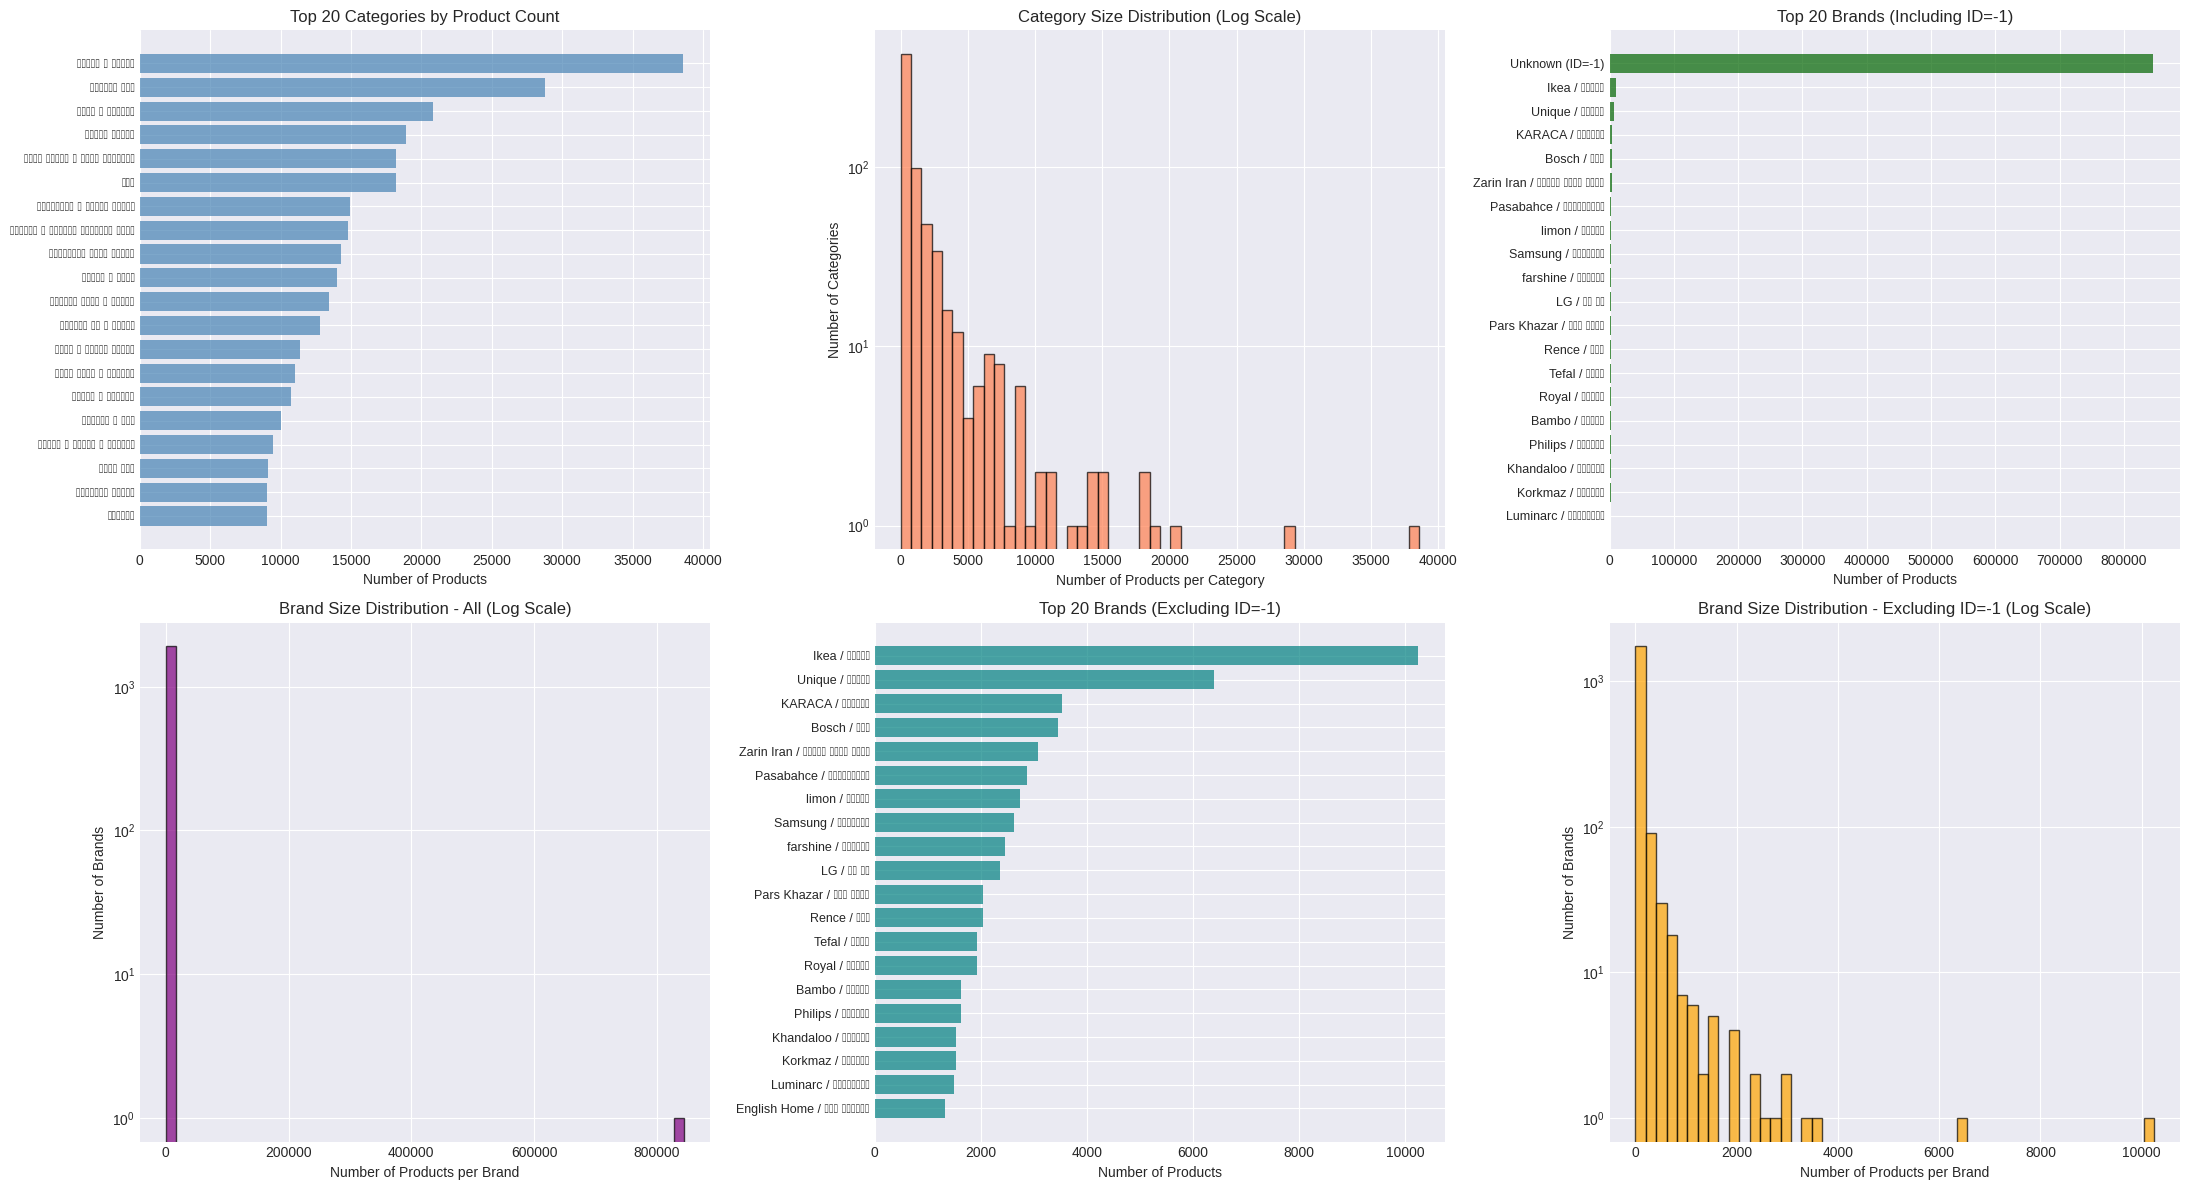


SUMMARY - CLASS IMBALANCE

🎯 KEY FINDINGS:
   ✓ Categories show 38,588x imbalance (top vs bottom)
   ✓ Brands (all) show 844,871x imbalance (top vs bottom)
   ✓ Brands (excl. ID=-1) show 10,245x imbalance
   ✓ 130 categories have < 100 products
   ✓ 1,576 brands (all) have < 100 products
   ✓ 1,576 brands (excl. ID=-1) have < 100 products

⚠️  IMPLICATIONS:
   - Highly imbalanced dataset may require special handling
   - Consider grouping rare categories/brands or using class weights
   - May need stratified sampling for train/test split
   - 82.6% of products have unknown brand (ID=-1)


In [7]:
print("=" * 80)
print("CLASS IMBALANCE ANALYSIS - CATEGORIES & BRANDS")
print("=" * 80)

# ===== CATEGORY IMBALANCE ANALYSIS =====
print(f"\n{'='*80}")
print("CATEGORY DISTRIBUTION ANALYSIS")
print("="*80)

# Get category distribution
category_counts = base_products['category_id'].value_counts().sort_values(ascending=False)
total_products = len(base_products)

print(f"\n📊 CATEGORY STATISTICS:")
print(f"   Total categories in use: {base_products['category_id'].nunique():,}")
print(f"   Total defined categories: {len(categories):,}")
print(f"   Products without category: {(base_products['category_id'].isnull() | (base_products['category_id'] == 0)).sum():,}")

# Top and bottom categories
print(f"\n🔝 TOP 10 CATEGORIES:")
for idx, (cat_id, count) in enumerate(category_counts.head(10).items(), 1):
    pct = count / total_products * 100
    cat_name = categories[categories['id'] == cat_id]['title'].values
    cat_name = cat_name[0] if len(cat_name) > 0 else "Unknown"
    print(f"   {idx:2d}. {cat_name[:40]:40s} | ID: {cat_id:6.0f} | Count: {count:>8,} ({pct:>5.2f}%)")

print(f"\n🔻 BOTTOM 10 CATEGORIES:")
for idx, (cat_id, count) in enumerate(category_counts.tail(10).items(), 1):
    pct = count / total_products * 100
    cat_name = categories[categories['id'] == cat_id]['title'].values
    cat_name = cat_name[0] if len(cat_name) > 0 else "Unknown"
    print(f"   {idx:2d}. {cat_name[:40]:40s} | ID: {cat_id:6.0f} | Count: {count:>8,} ({pct:>5.2f}%)")

# Calculate imbalance metrics
top_category_pct = (category_counts.iloc[0] / total_products) * 100
bottom_category_pct = (category_counts.iloc[-1] / total_products) * 100
imbalance_ratio = category_counts.iloc[0] / category_counts.iloc[-1]

print(f"\n⚖️  CATEGORY IMBALANCE METRICS:")
print(f"   Top category share: {top_category_pct:.2f}%")
print(f"   Bottom category share: {bottom_category_pct:.4f}%")
print(f"   Imbalance ratio (top/bottom): {imbalance_ratio:,.2f}x")
print(f"   Categories with <100 products: {(category_counts < 100).sum():,}")
print(f"   Categories with <10 products: {(category_counts < 10).sum():,}")

# ===== BRAND IMBALANCE ANALYSIS =====
print(f"\n{'='*80}")
print("BRAND DISTRIBUTION ANALYSIS")
print("="*80)

# Get brand distribution (including all brands)
brand_counts = base_products['brand_id'].value_counts().sort_values(ascending=False)

print(f"\n📊 BRAND STATISTICS (ALL):")
print(f"   Total brands in use: {base_products['brand_id'].nunique():,}")
print(f"   Total defined brands: {len(brands):,}")
print(f"   Products without brand: {(base_products['brand_id'].isnull() | (base_products['brand_id'] == 0)).sum():,}")
print(f"   Products with unknown brand (ID=-1): {(base_products['brand_id'] == -1).sum():,} ({(base_products['brand_id'] == -1).sum()/len(base_products)*100:.2f}%)")

# Top and bottom brands
print(f"\n🔝 TOP 10 BRANDS:")
for idx, (brand_id, count) in enumerate(brand_counts.head(10).items(), 1):
    pct = count / total_products * 100
    brand_name = brands[brands['id'] == brand_id]['title'].values
    brand_name = brand_name[0] if len(brand_name) > 0 else "Unknown"
    print(f"   {idx:2d}. {brand_name[:40]:40s} | ID: {brand_id:6.0f} | Count: {count:>8,} ({pct:>5.2f}%)")

print(f"\n🔻 BOTTOM 10 BRANDS:")
for idx, (brand_id, count) in enumerate(brand_counts.tail(10).items(), 1):
    pct = count / total_products * 100
    brand_name = brands[brands['id'] == brand_id]['title'].values
    brand_name = brand_name[0] if len(brand_name) > 0 else "Unknown"
    print(f"   {idx:2d}. {brand_name[:40]:40s} | ID: {brand_id:6.0f} | Count: {count:>8,} ({pct:>5.2f}%)")

# Calculate imbalance metrics (all brands)
top_brand_pct = (brand_counts.iloc[0] / total_products) * 100
bottom_brand_pct = (brand_counts.iloc[-1] / total_products) * 100
brand_imbalance_ratio = brand_counts.iloc[0] / brand_counts.iloc[-1]

print(f"\n⚖️  BRAND IMBALANCE METRICS (ALL):")
print(f"   Top brand share: {top_brand_pct:.2f}%")
print(f"   Bottom brand share: {bottom_brand_pct:.4f}%")
print(f"   Imbalance ratio (top/bottom): {brand_imbalance_ratio:,.2f}x")
print(f"   Brands with <100 products: {(brand_counts < 100).sum():,}")
print(f"   Brands with <10 products: {(brand_counts < 10).sum():,}")

# ===== BRAND ANALYSIS (EXCLUDING ID = -1) =====
print(f"\n{'='*80}")
print("BRAND DISTRIBUTION ANALYSIS (EXCLUDING UNKNOWN BRAND ID=-1)")
print("="*80)

# Filter out brand_id == -1
base_products_known_brands = base_products[base_products['brand_id'] != -1]
brand_counts_filtered = base_products_known_brands['brand_id'].value_counts().sort_values(ascending=False)
total_products_filtered = len(base_products_known_brands)

print(f"\n📊 BRAND STATISTICS (EXCLUDING ID=-1):")
print(f"   Total products with known brands: {total_products_filtered:,}")
print(f"   Unique brands in use: {base_products_known_brands['brand_id'].nunique():,}")

# Top brands (excluding -1)
print(f"\n🔝 TOP 10 BRANDS (EXCLUDING ID=-1):")
for idx, (brand_id, count) in enumerate(brand_counts_filtered.head(10).items(), 1):
    pct = count / total_products_filtered * 100
    brand_name = brands[brands['id'] == brand_id]['title'].values
    brand_name = brand_name[0] if len(brand_name) > 0 else "Unknown"
    print(f"   {idx:2d}. {brand_name[:40]:40s} | ID: {brand_id:6.0f} | Count: {count:>8,} ({pct:>5.2f}%)")

# Calculate imbalance metrics (excluding -1)
top_brand_pct_filtered = (brand_counts_filtered.iloc[0] / total_products_filtered) * 100
bottom_brand_pct_filtered = (brand_counts_filtered.iloc[-1] / total_products_filtered) * 100
brand_imbalance_ratio_filtered = brand_counts_filtered.iloc[0] / brand_counts_filtered.iloc[-1]

print(f"\n⚖️  BRAND IMBALANCE METRICS (EXCLUDING ID=-1):")
print(f"   Top brand share: {top_brand_pct_filtered:.2f}%")
print(f"   Bottom brand share: {bottom_brand_pct_filtered:.4f}%")
print(f"   Imbalance ratio (top/bottom): {brand_imbalance_ratio_filtered:,.2f}x")
print(f"   Brands with <100 products: {(brand_counts_filtered < 100).sum():,}")
print(f"   Brands with <10 products: {(brand_counts_filtered < 10).sum():,}")

# ===== VISUALIZATIONS =====
fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# 1. Top 20 Categories Bar Chart
top_20_cats = category_counts.head(20)
cat_names = []
for cat_id in top_20_cats.index:
    cat_name = categories[categories['id'] == cat_id]['title'].values
    cat_name = cat_name[0][:30] if len(cat_name) > 0 else f"ID_{cat_id}"
    # Apply Persian text fix
    cat_names.append(fix_persian_text(cat_name))

axes[0, 0].barh(range(len(top_20_cats)), top_20_cats.values, color='steelblue', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_20_cats)))
axes[0, 0].set_yticklabels(cat_names, fontsize=9)
axes[0, 0].set_xlabel('Number of Products')
axes[0, 0].set_title('Top 20 Categories by Product Count')
axes[0, 0].invert_yaxis()
axes[0, 0].ticklabel_format(style='plain', axis='x')

# 2. Category Distribution - Log Scale
axes[0, 1].hist(category_counts.values, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Number of Products per Category')
axes[0, 1].set_ylabel('Number of Categories')
axes[0, 1].set_title('Category Size Distribution (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].ticklabel_format(style='plain', axis='x')

# 3. Top 20 Brands Bar Chart (All brands including -1)
top_20_brands = brand_counts.head(20)
brand_names = []
for brand_id in top_20_brands.index:
    if brand_id == -1:
        brand_names.append(fix_persian_text("Unknown (ID=-1)"))
    else:
        brand_name = brands[brands['id'] == brand_id]['title'].values
        brand_name = brand_name[0][:30] if len(brand_name) > 0 else f"ID_{brand_id}"
        brand_names.append(fix_persian_text(brand_name))

axes[0, 2].barh(range(len(top_20_brands)), top_20_brands.values, color='darkgreen', alpha=0.7)
axes[0, 2].set_yticks(range(len(top_20_brands)))
axes[0, 2].set_yticklabels(brand_names, fontsize=9)
axes[0, 2].set_xlabel('Number of Products')
axes[0, 2].set_title('Top 20 Brands (Including ID=-1)')
axes[0, 2].invert_yaxis()
axes[0, 2].ticklabel_format(style='plain', axis='x')

# 4. Brand Distribution - Log Scale (All brands)
axes[1, 0].hist(brand_counts.values, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_xlabel('Number of Products per Brand')
axes[1, 0].set_ylabel('Number of Brands')
axes[1, 0].set_title('Brand Size Distribution - All (Log Scale)')
axes[1, 0].set_yscale('log')
axes[1, 0].ticklabel_format(style='plain', axis='x')

# 5. Top 20 Brands Bar Chart (EXCLUDING ID=-1)
top_20_brands_filtered = brand_counts_filtered.head(20)
brand_names_filtered = []
for brand_id in top_20_brands_filtered.index:
    brand_name = brands[brands['id'] == brand_id]['title'].values
    brand_name = brand_name[0][:30] if len(brand_name) > 0 else f"ID_{brand_id}"
    brand_names_filtered.append(fix_persian_text(brand_name))

axes[1, 1].barh(range(len(top_20_brands_filtered)), top_20_brands_filtered.values, color='teal', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_20_brands_filtered)))
axes[1, 1].set_yticklabels(brand_names_filtered, fontsize=9)
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_title('Top 20 Brands (Excluding ID=-1)')
axes[1, 1].invert_yaxis()
axes[1, 1].ticklabel_format(style='plain', axis='x')

# 6. Brand Distribution - Log Scale (EXCLUDING ID=-1)
axes[1, 2].hist(brand_counts_filtered.values, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 2].set_xlabel('Number of Products per Brand')
axes[1, 2].set_ylabel('Number of Brands')
axes[1, 2].set_title('Brand Size Distribution - Excluding ID=-1 (Log Scale)')
axes[1, 2].set_yscale('log')
axes[1, 2].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'='*80}")
print("SUMMARY - CLASS IMBALANCE")
print("="*80)
print(f"\n🎯 KEY FINDINGS:")
print(f"   ✓ Categories show {imbalance_ratio:,.0f}x imbalance (top vs bottom)")
print(f"   ✓ Brands (all) show {brand_imbalance_ratio:,.0f}x imbalance (top vs bottom)")
print(f"   ✓ Brands (excl. ID=-1) show {brand_imbalance_ratio_filtered:,.0f}x imbalance")
print(f"   ✓ {(category_counts < 100).sum():,} categories have < 100 products")
print(f"   ✓ {(brand_counts < 100).sum():,} brands (all) have < 100 products")
print(f"   ✓ {(brand_counts_filtered < 100).sum():,} brands (excl. ID=-1) have < 100 products")
print(f"\n⚠️  IMPLICATIONS:")
print(f"   - Highly imbalanced dataset may require special handling")
print(f"   - Consider grouping rare categories/brands or using class weights")
print(f"   - May need stratified sampling for train/test split")
print(f"   - {(base_products['brand_id'] == -1).sum()/len(base_products)*100:.1f}% of products have unknown brand (ID=-1)")

In [13]:
# Missingness analysis (focused on important columns)
# Note: for text columns, we treat empty/whitespace as missing in addition to true NaN/None.

from IPython.display import display

def summarize_missingness(df, columns, table_name, text_columns=None):
    if text_columns is None:
        text_columns = set()
    else:
        text_columns = set(text_columns)

    n = len(df)
    rows = []

    placeholder_tokens = {"none", "null", "nan", "n/a", "na", "-", "--", "unknown", "?"}

    for col in columns:
        if col not in df.columns:
            rows.append({
                "Dataset": table_name,
                "Column": col,
                "Exists": False,
                "True Nulls": None,
                "Empty/WS": None,
                "Placeholders": None,
                "Missing (Total)": None,
                "Missing % (Total)": None,
            })
            continue

        s = df[col]
        true_nulls = int(s.isna().sum())

        empty_ws = 0
        placeholders = 0
        total_missing = true_nulls

        # Only apply string-missingness rules to declared text columns OR object/string columns
        is_text = (col in text_columns) or (pd.api.types.is_string_dtype(s) or pd.api.types.is_object_dtype(s))
        if is_text:
            s_str = s.astype("string")
            stripped = s_str.str.strip()
            empty_ws = int((stripped == "").sum())
            placeholders = int(stripped.str.lower().isin(placeholder_tokens).sum())
            total_missing = int(((s_str.isna()) | (stripped == "") | (stripped.str.lower().isin(placeholder_tokens))).sum())

        missing_pct = float((total_missing / n) * 100) if n else 0.0

        rows.append({
            "Dataset": table_name,
            "Column": col,
            "Exists": True,
            "True Nulls": true_nulls,
            "Empty/WS": empty_ws if is_text else None,
            "Placeholders": placeholders if is_text else None,
            "Missing (Total)": total_missing,
            "Missing % (Total)": missing_pct,
        })

    return pd.DataFrame(rows)


IMPORTANT_COLUMNS = {
    "base_products": {
        "columns": ["random_key", "persian_name", "english_name", "brand_id", "category_id", "image_url" ,"extra_features"],
        "text": ["persian_name", "english_name", "image_url"],
    },
    "members": {
        "columns": ["random_key", "base_random_key", "shop_id", "price"],
        "text": [],
    },
    "searches": {
        "columns": ["query", "category_id"],
        "text": ["query"],
    },
}

frames = []
for table_name, spec in IMPORTANT_COLUMNS.items():
    if table_name not in datasets:
        continue
    frames.append(
        summarize_missingness(
            datasets[table_name],
            columns=spec["columns"],
            table_name=table_name,
            text_columns=spec.get("text", []),
        )
    )

summary_df = pd.concat(frames, ignore_index=True)

print("=" * 80)
print("FOCUSED MISSINGNESS (important columns; text counts include empty/whitespace)")
print("=" * 80)
display(summary_df.sort_values(["Dataset", "Missing % (Total)"], ascending=[True, False]))

# Quick highlight: only problematic (missing > 0)
problem_df = summary_df[(summary_df["Exists"] == True) & (summary_df["Missing (Total)"] > 0)].copy()
if len(problem_df) > 0:
    print("\nColumns with missingness detected:")
    display(problem_df.sort_values(["Missing % (Total)"], ascending=False))
else:
    print("\n✅ No missingness detected in the selected important columns.")

# If you want to normalize for later steps (without overwriting originals):
# base_products['english_name_norm'] = base_products['english_name'].astype('string').str.strip().replace({'': pd.NA})

FOCUSED MISSINGNESS (important columns; text counts include empty/whitespace)


,Dataset,Column,Exists,True Nulls,Empty/WS,Placeholders,Missing (Total),Missing % (Total)
2,base_products,english_name,True,0,944724.0,38.0,944762,92.415519
5,base_products,image_url,True,3341,0.0,0.0,3341,0.326813
1,base_products,persian_name,True,0,2.0,0.0,2,0.000196
0,base_products,random_key,True,0,0.0,0.0,0,0.000000
3,base_products,brand_id,True,0,NaN,NaN,0,0.000000
4,base_products,category_id,True,0,NaN,NaN,0,0.000000
6,base_products,extra_features,True,0,0.0,0.0,0,0.000000
7,members,random_key,True,0,0.0,0.0,0,0.000000
8,members,base_random_key,True,0,0.0,0.0,0,0.000000
9,members,shop_id,True,0,NaN,NaN,0,0.000000



Columns with missingness detected:


,Dataset,Column,Exists,True Nulls,Empty/WS,Placeholders,Missing (Total),Missing % (Total)
2,base_products,english_name,True,0,944724.0,38.0,944762,92.415519
5,base_products,image_url,True,3341,0.0,0.0,3341,0.326813
1,base_products,persian_name,True,0,2.0,0.0,2,0.000196


In [12]:
# Sample rows where BOTH persian_name and english_name are present (non-empty after strip)
from IPython.display import display

placeholder_tokens = {"none", "null", "nan", "n/a", "na", "-", "--", "unknown", "?"}

# Normalize to strings and strip whitespace
pn = base_products["persian_name"].astype("string").str.strip()
en = base_products["english_name"].astype("string").str.strip()

mask_good = (
    pn.notna()
    & (pn != "")
    & (~pn.str.lower().isin(placeholder_tokens))
    & en.notna()
    & (en != "")
    & (~en.str.lower().isin(placeholder_tokens))
)

good_names_df = base_products.loc[mask_good, ["random_key", "persian_name", "english_name"]].copy()

print("=" * 80)
print("SAMPLE: base_products rows with BOTH persian_name and english_name present")
print("=" * 80)
print(f"Total base_products rows: {len(base_products):,}")
print(f"Rows with both names present: {len(good_names_df):,} ({len(good_names_df)/len(base_products)*100:.2f}%)")

# Show 20 random examples (reproducible)
display(good_names_df.sample(n=min(20, len(good_names_df)), random_state=42).reset_index(drop=True))

SAMPLE: base_products rows with BOTH persian_name and english_name present
Total base_products rows: 1,022,298
Rows with both names present: 77,535 (7.58%)


,random_key,persian_name,english_name
0,eakpcd,اسپری خوشبو کننده هوا فبرز با رایحه شکوفه های ...,Febreze-air-freshener-spray-with-spring-blosso...
1,lzklrg,سرویس قابلمه 7 پارچه کاراجا Biodiamond Expert ...,ارسال 7 روز کاری
2,buiyet,درختچه مصنوعی موز ۳تنه ارتفاع ۱۵۰سانتی‌متر,Banana 3 trunk
3,bpshhq,اتو بخار بیسمارک مدل BM6618,Bismark BM6618 Steam Iron
4,mducqm,تیغه چرخ گوشت سالوادور سایز 12,SALVADOR chopper
5,imcgzh,سرویس قابلمه ۹ پارچه کی زد پی مدل آلما - قابلم...,KZP Alma 9-piece pot set
6,sjsknj,فرش اعیان کلکسیون 1000 شانه طرح 10217 صدفی,mahris-mahtab-c
7,cmbyxg,خردکن کلیک مدل MP‑2025,Click shredder model MP‑2025
8,dihkoo,فرش دستباف 2.3متری ساربان تمام پشم نقش ترنجی ک...,"Handmade 2.3m rug, Sareban full wool latch and..."
9,ufptmy,لیف قلب 4112,Wash Accessories


In [ ]:
# Minimal consistency checklist (PDF-aligned)
# - Skips re-doing large EDA blocks you've already done (e.g., full price distribution plots).
# - Runs only checks that match the PDF-described relationships/columns AND exist in your loaded DataFrames.

from IPython.display import display
import ast
import json
import numpy as np
import pandas as pd

def _col_exists(df, col):
    return df is not None and col in df.columns

def _safe_series(df, col):
    return df[col] if _col_exists(df, col) else None

def _to_utc_datetime(s: pd.Series) -> pd.Series:
    """Best-effort conversion of timestamps to UTC datetimes.
    Handles datetime-like, numeric epoch seconds/ms/us/ns, and string timestamps.
    """
    if s is None:
        return None
    if pd.api.types.is_datetime64_any_dtype(s):
        # Ensure UTC if possible
        try:
            return s.dt.tz_convert('UTC') if getattr(s.dt, 'tz', None) is not None else s.dt.tz_localize('UTC')
        except Exception:
            return s
    if pd.api.types.is_numeric_dtype(s):
        # Infer unit by magnitude (rough heuristic)
        vals = s.dropna()
        if len(vals) == 0:
            return pd.to_datetime(s, errors='coerce', utc=True)
        med = float(np.nanmedian(vals.astype('float64')))
        unit = 's'
        if med > 1e18:
            unit = 'ns'
        elif med > 1e15:
            unit = 'us'
        elif med > 1e12:
            unit = 'ms'
        else:
            unit = 's'
        return pd.to_datetime(s, unit=unit, errors='coerce', utc=True)
    # Fallback: parse strings/objects
    return pd.to_datetime(s, errors='coerce', utc=True)

def check_fk(child_df, child_col, parent_df, parent_col, *, allow_values=None, name=None, sample_invalid=10):
    """Check foreign key validity: child[child_col] should be in parent[parent_col].
    allow_values: set/list of special allowed values (e.g., {0, -1}).
    """
    if allow_values is None:
        allow_values = set()
    else:
        allow_values = set(allow_values)
    if child_df is None or parent_df is None or child_col not in child_df.columns or parent_col not in parent_df.columns:
        return {"Check": name or f"{child_col} -> {parent_col}", "Status": "SKIP", "Reason": "missing table/column"}
    child = child_df[child_col]
    parent_keys = set(parent_df[parent_col].dropna().unique())
    nulls = int(child.isna().sum())
    allowed = int(child.isin(list(allow_values)).sum()) if allow_values else 0
    # Consider valid: in parent OR allowed OR null
    invalid_mask = (~child.isna())
    if allow_values:
        invalid_mask &= (~child.isin(list(allow_values)))
    invalid_mask &= (~child.isin(list(parent_keys)))
    invalid = int(invalid_mask.sum())
    total = int(len(child))
    examples = child_df.loc[invalid_mask, [child_col]].head(sample_invalid).to_dict('records') if invalid > 0 else []
    return {
        "Check": name or f"{child_col} -> {parent_col}",
        "Status": "PASS" if invalid == 0 else "FAIL",
        "Total": total,
        "Nulls": nulls,
        "Allowed": allowed,
        "Invalid": invalid,
        "Invalid %": (invalid / total * 100) if total else 0.0,
        "Examples": examples,
    }

def check_duplicates(df, key_cols, *, name=None, sample=10):
    if df is None or any(col not in df.columns for col in key_cols):
        return {"Check": name or f"Duplicates on {key_cols}", "Status": "SKIP", "Reason": "missing table/column"}
    dup_mask = df.duplicated(subset=key_cols, keep=False)
    dup_count = int(dup_mask.sum())
    examples = df.loc[dup_mask, key_cols].head(sample).to_dict('records') if dup_count > 0 else []
    return {
        "Check": name or f"Duplicates on {key_cols}",
        "Status": "PASS" if dup_count == 0 else "FAIL",
        "Duplicates": dup_count,
        "Examples": examples,
    }

def check_timestamp_order(searches_df, base_views_df, final_clicks_df):
    rows = []
    # base_views.search_id -> searches.id, and base_views.timestamp >= searches.timestamp (if both present)
    if (searches_df is not None and base_views_df is not None
        and _col_exists(base_views_df, 'search_id') and _col_exists(searches_df, 'id')
        and _col_exists(base_views_df, 'timestamp') and _col_exists(searches_df, 'timestamp')):
        bv = base_views_df[['search_id', 'timestamp']].copy()
        se = searches_df[['id', 'timestamp']].copy()
        bv['ts_bv'] = _to_utc_datetime(bv['timestamp'])
        se['ts_search'] = _to_utc_datetime(se['timestamp'])
        joined = bv.merge(se, left_on='search_id', right_on='id', how='left', suffixes=('', '_search'))
        # If the FK is valid, ts_search should exist. We only check ordering where both timestamps parse.
        ok_mask = joined['ts_bv'].notna() & joined['ts_search'].notna()
        bad = int((joined.loc[ok_mask, 'ts_bv'] < joined.loc[ok_mask, 'ts_search']).sum())
        total = int(ok_mask.sum())
        rows.append({
            'Check': 'Timestamp order: base_views.timestamp >= searches.timestamp (joined by search_id)',
            'Status': 'PASS' if bad == 0 else 'FAIL',
            'Compared': total,
            'Violations': bad,
            'Violation %': (bad / total * 100) if total else 0.0,
        })
    else:
        rows.append({"Check": "Timestamp order: base_views >= searches", "Status": "SKIP", "Reason": "missing columns"})
    # final_clicks.base_view_id -> base_views.id, and final_clicks.timestamp >= base_views.timestamp
    if (final_clicks_df is not None and base_views_df is not None
        and _col_exists(final_clicks_df, 'base_view_id') and _col_exists(base_views_df, 'id')
        and _col_exists(final_clicks_df, 'timestamp') and _col_exists(base_views_df, 'timestamp')):
        fc = final_clicks_df[['base_view_id', 'timestamp']].copy()
        bv2 = base_views_df[['id', 'timestamp']].copy()
        fc['ts_fc'] = _to_utc_datetime(fc['timestamp'])
        bv2['ts_bv'] = _to_utc_datetime(bv2['timestamp'])
        joined = fc.merge(bv2, left_on='base_view_id', right_on='id', how='left', suffixes=('', '_bv'))
        ok_mask = joined['ts_fc'].notna() & joined['ts_bv'].notna()
        bad = int((joined.loc[ok_mask, 'ts_fc'] < joined.loc[ok_mask, 'ts_bv']).sum())
        total = int(ok_mask.sum())
        rows.append({
            'Check': 'Timestamp order: final_clicks.timestamp >= base_views.timestamp (joined by base_view_id)',
            'Status': 'PASS' if bad == 0 else 'FAIL',
            'Compared': total,
            'Violations': bad,
            'Violation %': (bad / total * 100) if total else 0.0,
        })
    else:
        rows.append({"Check": "Timestamp order: final_clicks >= base_views", "Status": "SKIP", "Reason": "missing columns"})
    return rows

def check_categories_hierarchy(categories_df):
    if categories_df is None or 'id' not in categories_df.columns or 'parent_id' not in categories_df.columns:
        return {"Check": "Categories hierarchy", "Status": "SKIP", "Reason": "missing columns"}
    ids = set(categories_df['id'].dropna().unique())
    parent = categories_df['parent_id']
    # PDF: parent_id = -1 means no parent
    has_parent = (~parent.isna()) & (parent != -1)
    missing_parent = int((has_parent & (~parent.isin(list(ids)))).sum())
    self_parent = int((has_parent & (parent == categories_df['id'])).sum())
    return {
        "Check": "Categories hierarchical consistency (parent exists; no self-parent)",
        "Status": "PASS" if (missing_parent == 0 and self_parent == 0) else "FAIL",
        "Missing parent refs": missing_parent,
        "Self-parent rows": self_parent,
    }

def check_extra_features_json(base_products_df, sample_n=5000):
    if base_products_df is None or 'extra_features' not in base_products_df.columns:
        return {"Check": "extra_features JSON", "Status": "SKIP", "Reason": "missing column"}
    s = base_products_df['extra_features']
    # Sample non-null to keep it light
    non_null = s.dropna()
    if len(non_null) == 0:
        return {"Check": "extra_features JSON", "Status": "PASS", "Note": "all null"}
    sample = non_null.sample(n=min(sample_n, len(non_null)), random_state=42)
    invalid = 0
    empty_ws = 0
    for v in sample:
        if isinstance(v, (dict, list)):
            continue
        # stringify
        try:
            txt = str(v).strip()
        except Exception:
            invalid += 1
            continue
        if txt == "":
            empty_ws += 1
            continue
        # If it's already JSON-ish, try parse; if not JSON-ish, count as invalid
        if not (txt.startswith('{') or txt.startswith('[')):
            invalid += 1
            continue
        try:
            json.loads(txt)
        except Exception:
            invalid += 1
    total = len(sample)
    return {
        "Check": "Text & JSON fields normalized: base_products.extra_features parses as JSON (sample)",
        "Status": "PASS" if (invalid == 0 and empty_ws == 0) else "FAIL",
        "Sampled": total,
        "Empty/WS": empty_ws,
        "Invalid JSON": invalid,
        "Invalid %": (invalid / total * 100) if total else 0.0,
    }

def check_search_result_base_products(searches_df, base_products_df, sample_rows=2000, sample_invalid=10):
    """PDF: searches has a list of base_random_key values shown to user (result_base_prod_*).
    We validate a sample of those keys are present in base_products.random_key.
    """
    if searches_df is None or base_products_df is None:
        return {"Check": "Search results base products exist", "Status": "SKIP", "Reason": "missing tables"}
    if 'random_key' not in base_products_df.columns:
        return {"Check": "Search results base products exist", "Status": "SKIP", "Reason": "missing base_products.random_key"}
    base_keys = set(base_products_df['random_key'].dropna().unique())
    # Candidate columns (PDF formatting may split the name; we match by keywords)
    cols = [c for c in searches_df.columns if ('result' in c.lower() and ('rk' in c.lower() or 'random' in c.lower()))]
    if not cols:
        cols = [c for c in searches_df.columns if 'result' in c.lower()]
    if not cols:
        return {"Check": "Search results base products exist", "Status": "SKIP", "Reason": "no result list column found in searches"}
    col = cols[0]
    s = searches_df[col].dropna()
    if len(s) == 0:
        return {"Check": f"Search results keys valid ({col})", "Status": "PASS", "Note": "all null"}
    sample = s.sample(n=min(sample_rows, len(s)), random_state=42)
    total_keys = 0
    invalid = 0
    examples = []
    for v in sample:
        keys = []
        if isinstance(v, (list, tuple, set, np.ndarray)):
            keys = list(v)
        elif isinstance(v, str):
            txt = v.strip()
            if txt == "":
                continue
            parsed = None
            try:
                if txt.startswith('[') or txt.startswith('{'):
                    parsed = json.loads(txt)
                else:
                    parsed = ast.literal_eval(txt)
            except Exception:
                parsed = None
            if isinstance(parsed, dict):
                # Unknown structure; skip dicts for now
                keys = []
            elif isinstance(parsed, (list, tuple, set)):
                keys = list(parsed)
            elif parsed is not None:
                keys = [parsed]
            else:
                # last resort: comma split
                keys = [k.strip() for k in txt.strip('[]()').split(',') if k.strip()]
        else:
            keys = [v]
        for k in keys:
            if k is None:
                continue
            # Normalize to string keys if needed (random_key often is a string)
            if isinstance(k, float) and np.isnan(k):
                continue
            total_keys += 1
            if k not in base_keys:
                invalid += 1
                if len(examples) < sample_invalid:
                    examples.append({"bad_key": k})
    return {
        "Check": f"Search results keys valid ({col})",
        "Status": "PASS" if invalid == 0 else "FAIL",
        "Sample rows": len(sample),
        "Keys checked": total_keys,
        "Invalid keys": invalid,
        "Invalid %": (invalid / total_keys * 100) if total_keys else 0.0,
        "Examples": examples,
    }

def check_text_normalization(df, col, placeholder_tokens=None):
    if placeholder_tokens is None:
        placeholder_tokens = {"none", "null", "nan", "n/a", "na", "-", "--", "unknown", "?"}
    if df is None or col not in df.columns:
        return {"Check": f"Normalize text: {col}", "Status": "SKIP", "Reason": "missing column"}
    s = df[col].astype('string')
    stripped = s.str.strip()
    leading_trailing = int(((s.notna()) & (s != stripped)).sum())
    placeholders = int(stripped.str.lower().isin(placeholder_tokens).sum())
    empties = int((stripped == '').sum())
    return {
        "Check": f"Text normalization: {col} (trim/empties/placeholders)",
        "Status": "PASS" if (leading_trailing == 0 and placeholders == 0) else "WARN",
        "Leading/Trailing spaces": leading_trailing,
        "Empty strings": empties,
        "Placeholders": placeholders,
    }

# Fetch tables from the already-loaded datasets dict
searches_df = datasets.get('searches')
base_views_df = datasets.get('base_views')
final_clicks_df = datasets.get('final_clicks')
base_products_df = datasets.get('base_products')
members_df = datasets.get('members')
shops_df = datasets.get('shops')
categories_df = datasets.get('categories')
brands_df = datasets.get('brands')
cities_df = datasets.get('cities')

checks = []

print("=" * 80)
print("MINIMAL CONSISTENCY CHECKLIST (Phase 1 PDF)")
print("=" * 80)

# 1) Orphans / FK validity (beyond what you already checked)
# NOTE: You already checked Members->BaseProducts earlier; here we focus on the rest from the PDF definitions.
checks.append(check_fk(base_views_df, 'search_id', searches_df, 'id', name='FK: base_views.search_id -> searches.id'))
checks.append(check_fk(final_clicks_df, 'base_view_id', base_views_df, 'id', name='FK: final_clicks.base_view_id -> base_views.id'))
checks.append(check_fk(final_clicks_df, 'shop_id', shops_df, 'id', name='FK: final_clicks.shop_id -> shops.id'))
checks.append(check_fk(members_df, 'shop_id', shops_df, 'id', name='FK: members.shop_id -> shops.id'))
checks.append(check_fk(shops_df, 'city_id', cities_df, 'id', name='FK: shops.city_id -> cities.id'))
checks.append(check_fk(base_products_df, 'category_id', categories_df, 'id', allow_values={0}, name='FK: base_products.category_id -> categories.id (0 allowed)'))
checks.append(check_fk(searches_df, 'category_id', categories_df, 'id', allow_values={0}, name='FK: searches.category_id -> categories.id (0 allowed)'))
checks.append(check_fk(base_products_df, 'brand_id', brands_df, 'id', allow_values={0, -1}, name='FK: base_products.brand_id -> brands.id (0/-1 allowed)'))
checks.append(check_search_result_base_products(searches_df, base_products_df))

# 2) Duplicates (focused on keys not previously checked explicitly)
checks.append(check_duplicates(members_df, ['random_key'], name='No duplicated keys: members.random_key'))
checks.append(check_duplicates(base_products_df, ['random_key'], name='No duplicated keys: base_products.random_key'))
checks.append(check_duplicates(categories_df, ['id'], name='No duplicated keys: categories.id'))
checks.append(check_duplicates(brands_df, ['id'], name='No duplicated keys: brands.id'))
checks.append(check_duplicates(shops_df, ['id'], name='No duplicated keys: shops.id'))
checks.append(check_duplicates(cities_df, ['id'], name='No duplicated keys: cities.id'))

# 3) Timestamp ordering (joins defined in the PDF)
checks.extend(check_timestamp_order(searches_df, base_views_df, final_clicks_df))

# 4) Categories hierarchy consistency (PDF: parent_id=-1 means root)
checks.append(check_categories_hierarchy(categories_df))

# 5) Text & JSON normalization checks (PDF: extra_features is JSON)
checks.append(check_extra_features_json(base_products_df, sample_n=5000))
checks.append(check_text_normalization(base_products_df, 'persian_name'))
checks.append(check_text_normalization(base_products_df, 'english_name'))
checks.append(check_text_normalization(categories_df, 'title'))
checks.append(check_text_normalization(brands_df, 'title'))
checks.append(check_text_normalization(cities_df, 'name'))

# Build a compact summary table
summary = pd.DataFrame(checks)
display(summary[['Check', 'Status'] + [c for c in summary.columns if c not in {'Check','Status','Examples','Reason','Note'}]].fillna(''))

# Show examples for failures only (keep output small)
failures = summary[summary['Status'].isin(['FAIL'])]
if len(failures) > 0:
    print("\n⚠️  Failures (showing up to 10 example rows per check where available):")
    for _, row in failures.iterrows():
        print(f"- {row['Check']}")
        if 'Examples' in row and isinstance(row['Examples'], list) and len(row['Examples']) > 0:
            display(pd.DataFrame(row['Examples']))
else:
    print("\n✅ No hard failures detected in the executed checks.")



MINIMAL CONSISTENCY CHECKLIST (Phase 1 PDF)


,Check,Status,Total,Nulls,Allowed,Invalid,Invalid %,Sample rows,Keys checked,Invalid keys,Duplicates,Compared,Violations,Violation %,Missing parent refs,Self-parent rows,Sampled,Empty/WS,Invalid JSON,Leading/Trailing spaces,Empty strings,Placeholders
0,FK: base_views.search_id -> searches.id,PASS,199916.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
1,FK: final_clicks.base_view_id -> base_views.id,PASS,17371.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
2,FK: final_clicks.shop_id -> shops.id,PASS,17371.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
3,FK: members.shop_id -> shops.id,PASS,1948665.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
4,FK: shops.city_id -> cities.id,PASS,23342.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
5,FK: base_products.category_id -> categories.id...,PASS,1022298.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
6,FK: searches.category_id -> categories.id (0 a...,PASS,588347.0,0.0,461865.0,0.0,0.0,,,,,,,,,,,,,,,
7,FK: base_products.brand_id -> brands.id (0/-1 ...,PASS,1022298.0,0.0,844871.0,0.0,0.0,,,,,,,,,,,,,,,
8,Search results keys valid (result_base_product...,PASS,,,,,0.0,2000.0,38451.0,0.0,,,,,,,,,,,,
9,No duplicated keys: members.random_key,PASS,,,,,,,,,0.0,,,,,,,,,,,



✅ No hard failures detected in the executed checks.

Note on prices:
- 'Prices valid and reasonable' is already analyzed in the earlier PRICE ANALYSIS cell (distribution + outliers).
